In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8, 4)

In [3]:
data = pd.read_csv("test.csv")

In [4]:
print("First 5 rows of the dataset:")
display(data.head())

First 5 rows of the dataset:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:

print("\nMissing values in each column:")
print(data.isnull().sum())


Missing values in each column:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [6]:
print("\nData types and non-null counts:")
print(data.info())


Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
None


In [7]:
data["Fare"] = data["Fare"].fillna(data["Fare"].mean())

In [8]:
data["Cabin"] = data["Cabin"].fillna("Unknown")

In [9]:
data.dropna(subset=["Embarked"], inplace=True)

In [10]:
print("\nMissing values after cleaning:")
print(data.isnull().sum())


Missing values after cleaning:
PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           0
Embarked        0
dtype: int64


In [11]:
data["FamilySize"] = data["SibSp"] + data["Parch"]

In [12]:
data["AgeGroup"] = pd.cut(data["Age"], bins=[0, 18, 35, 50, 70, 100], labels=["0-18", "19-35", "36-50", "51-70", "71+"])


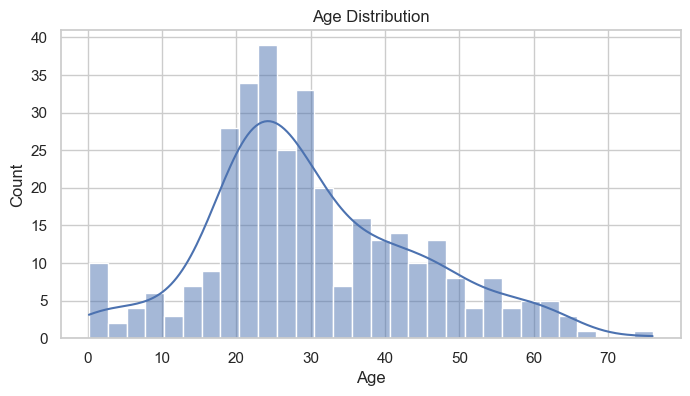

In [13]:
plt.figure()
sns.histplot(data["Age"], kde=True, bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

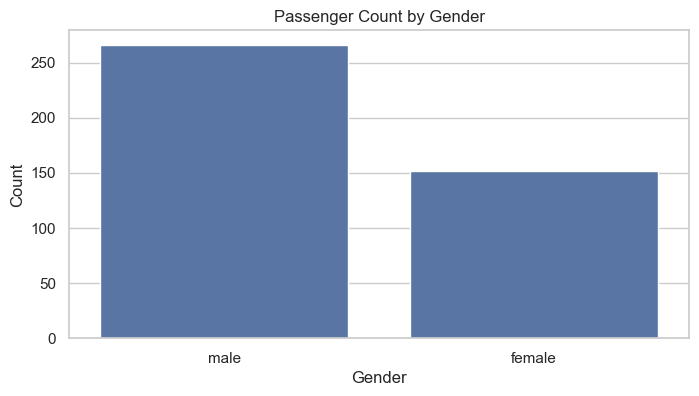

In [14]:
plt.figure()
sns.countplot(data=data, x="Sex")
plt.title("Passenger Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

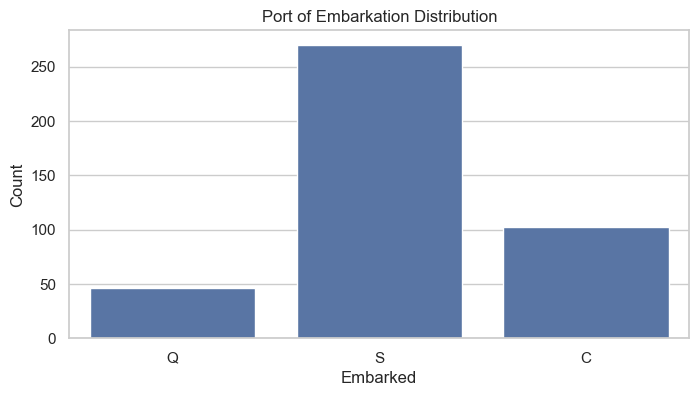

In [15]:
plt.figure()
sns.countplot(data=data, x="Embarked")
plt.title("Port of Embarkation Distribution")
plt.xlabel("Embarked")
plt.ylabel("Count")
plt.show()

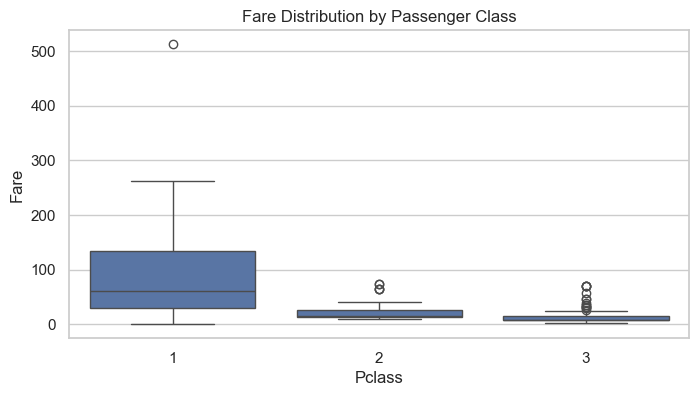

In [16]:
plt.figure()
sns.boxplot(data=data, x="Pclass", y="Fare")
plt.title("Fare Distribution by Passenger Class")
plt.xlabel("Pclass")
plt.ylabel("Fare")
plt.show()

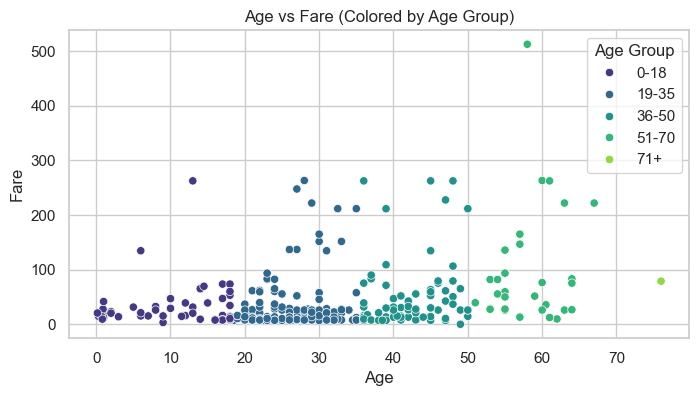

In [17]:
plt.figure()
sns.scatterplot(data=data, x="Age", y="Fare", hue="AgeGroup", palette="viridis")
plt.title("Age vs Fare (Colored by Age Group)")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.legend(title="Age Group")
plt.show()

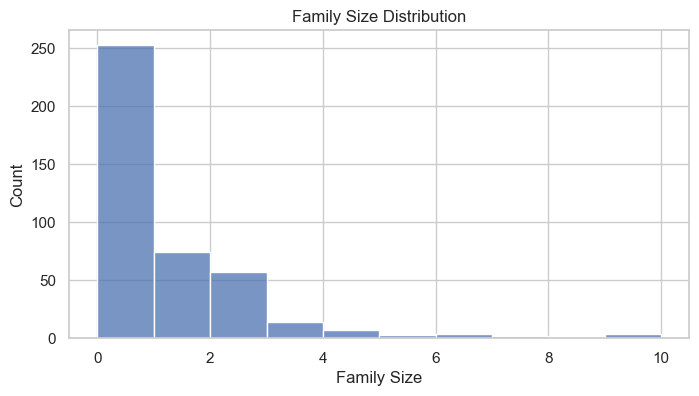

In [18]:
plt.figure()
sns.histplot(data=data, x="FamilySize", bins=10)
plt.title("Family Size Distribution")
plt.xlabel("Family Size")
plt.ylabel("Count")
plt.show()

In [19]:
print("\nDescriptive statistics:")
display(data.describe())


Descriptive statistics:


,PassengerId,Pclass,Age,SibSp,Parch,Fare,FamilySize
count,418.000000,418.000000,332.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188,0.839713
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.840500,1.519072
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,0.000000
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000,1.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,10.000000
